<a href="https://colab.research.google.com/github/kudason/MAT3562_ComputerVision/blob/main/Lab3/KhuatDangSon_20002159_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import exposure
import warnings
warnings.filterwarnings("ignore")

# Histogram Matching

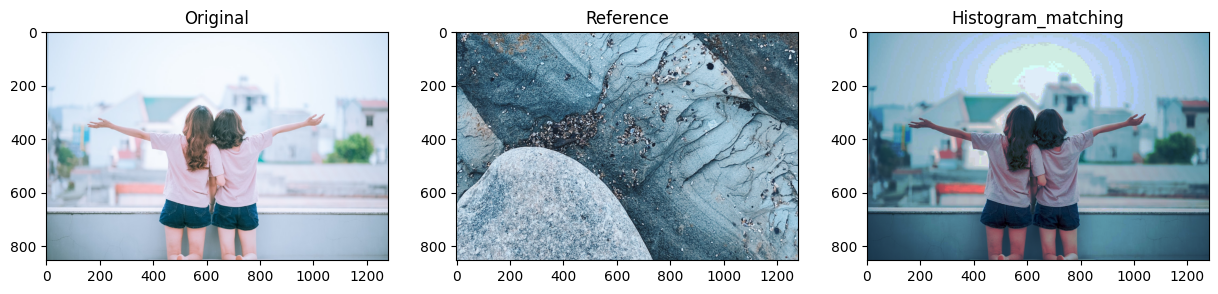

In [4]:
# Source Image
src = cv2.imread("girl1.jpg")
src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# Reference Image
ref = cv2.imread("natural1.jpg")
ref = cv2.cvtColor(ref, cv2.COLOR_BGR2RGB)

multi = True if src.shape[-1] > 1 else False

matched = exposure.match_histograms(src, ref, multichannel=multi)

images = [src, ref, matched]
titles = ["Original", "Reference", "Histogram_matching"]

plt.figure(figsize=(15, 5))

for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])

plt.show()

# Smooting Images

## Gaussian Blur

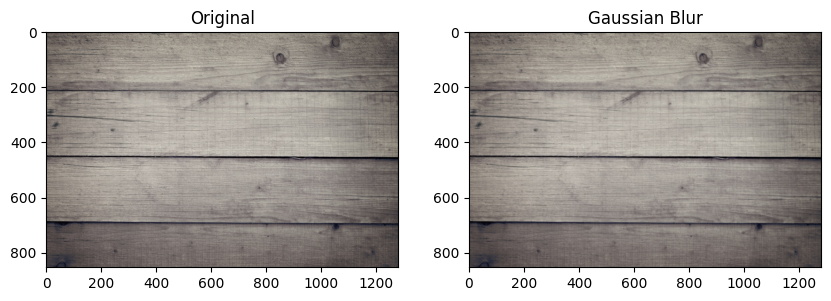

In [9]:
img = cv2.imread("wooden2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Gaussian Blur
img_gau = cv2.GaussianBlur(img, (3, 3), 0)

# Display Image
images = [img, img_gau]
titles = ["Original", "Gaussian Blur"]

plt.figure(figsize=(10, 5))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])

plt.show()

## Median Blur

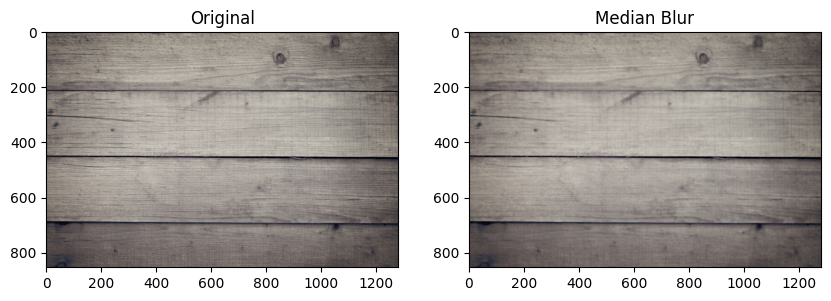

In [11]:
img = cv2.imread("wooden2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Median Blur
img_median = cv2.medianBlur(img, 5)

# Display Image
images = [img, img_median]
titles = ["Original", "Median Blur"]

plt.figure(figsize=(10, 5))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])

plt.show()

## Bilateral Blur

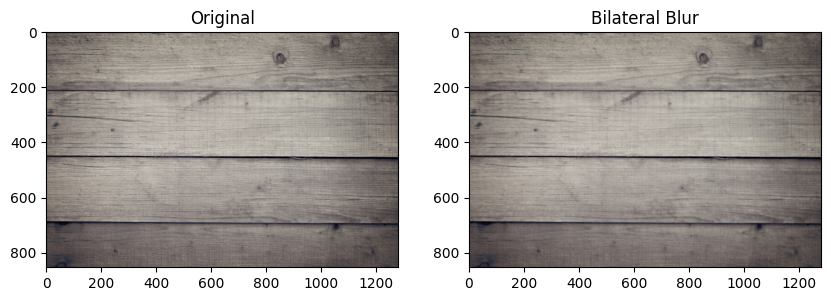

In [12]:
img = cv2.imread("wooden2.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Bilateral Blur
img_bila = cv2.bilateralFilter(img, 5, 180, 180)

# Display Image
images = [img, img_bila]
titles = ["Original", "Bilateral Blur"]

plt.figure(figsize=(10, 5))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i])
  plt.title(titles[i])

plt.show()

# Morphological Transformations

## Read Image, Create Filter

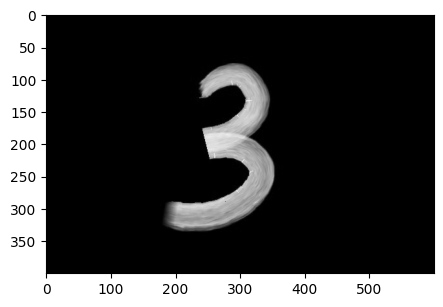

In [15]:
img = cv2.imread("number.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(5,5))
plt.imshow(img_gray, cmap="gray")
plt.show()

In [16]:
kernel = np.ones((5,5), np.uint8)
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


## Dilate Image

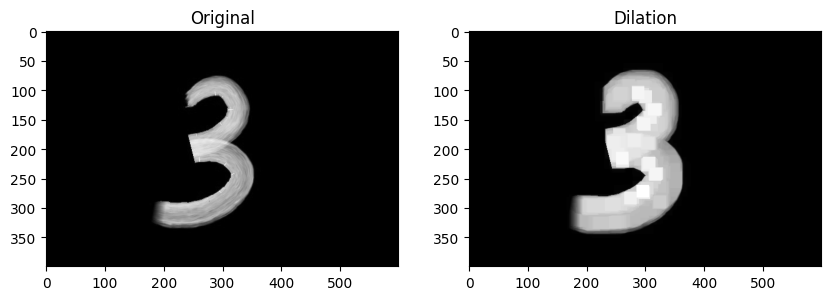

In [17]:
dilation = cv2.dilate(img_gray, kernel, iterations=5)
# Display Image
images = [img_gray, dilation]
titles = ["Original", "Dilation"]

plt.figure(figsize=(10, 5))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Erosion Image

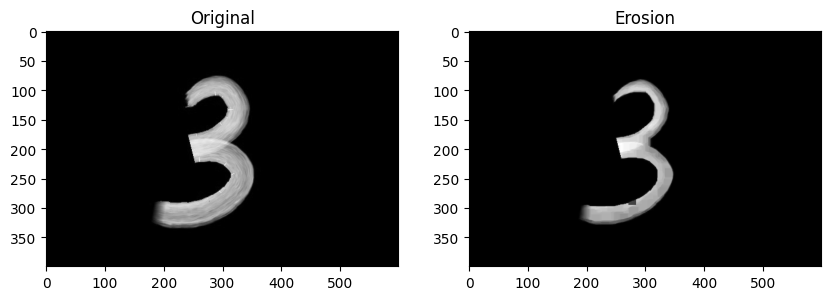

In [19]:
erosion = cv2.erode(img_gray, kernel, iterations=3)

# Display Image
images = [img_gray, erosion]
titles = ["Original", "Erosion"]

plt.figure(figsize=(10, 5))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Opening: Erosion followed by dilation

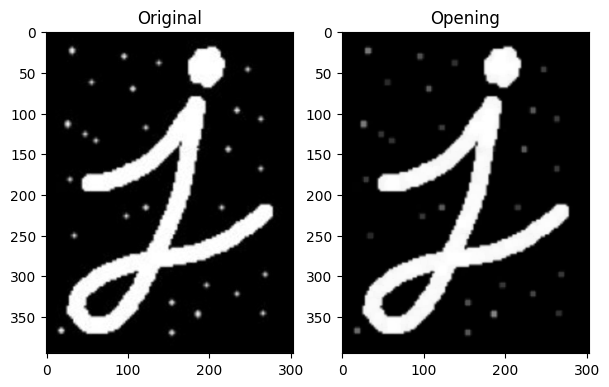

In [22]:
img = cv2.imread("opening.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

opening = cv2.morphologyEx(img_gray, cv2.MORPH_OPEN, kernel)

# Display Image
images = [img_gray, opening]
titles = ["Original", "Opening"]

plt.figure(figsize=(7, 5))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Closing: Dilation followed by ersion

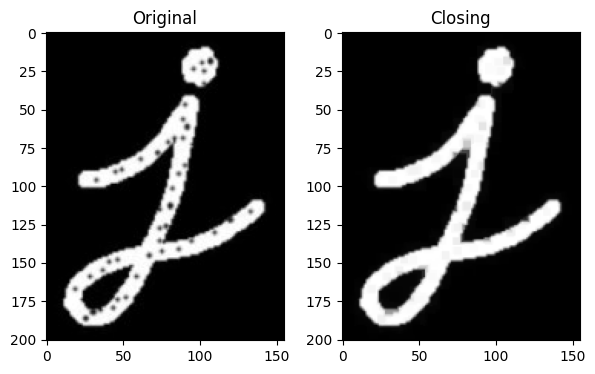

In [29]:
img = cv2.imread("closing.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

closing = cv2.morphologyEx(img_gray, cv2.MORPH_CLOSE, kernel)

# Display Image
images = [img_gray, closing]
titles = ["Original", "Closing"]

plt.figure(figsize=(7, 4))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Image Gradient: Sobel X

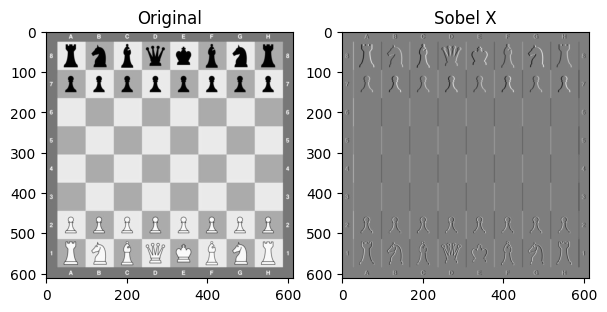

In [30]:
img = cv2.imread("chess_board.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# sobelx
sobelx = cv2.Sobel(img_gray, cv2.CV_64F, 1, 0, ksize=1)

# Display Image
images = [img_gray, sobelx]
titles = ["Original", "Sobel X"]

plt.figure(figsize=(7, 4))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Image Gradient: Sobel y

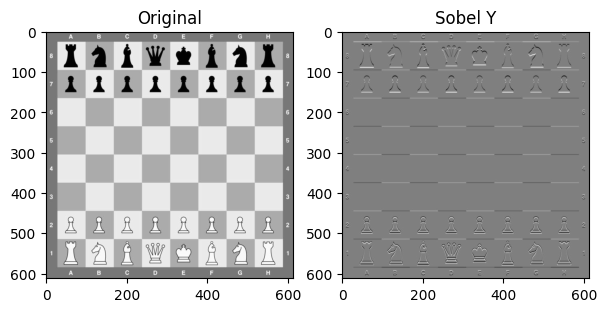

In [32]:
# sobely
sobely = cv2.Sobel(img_gray, cv2.CV_64F, 0, 1, ksize=1)

# Display Image
images = [img_gray, sobely]
titles = ["Original", "Sobel Y"]

plt.figure(figsize=(7, 4))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Image Gradient: addWeight sobel_x & sobel_y

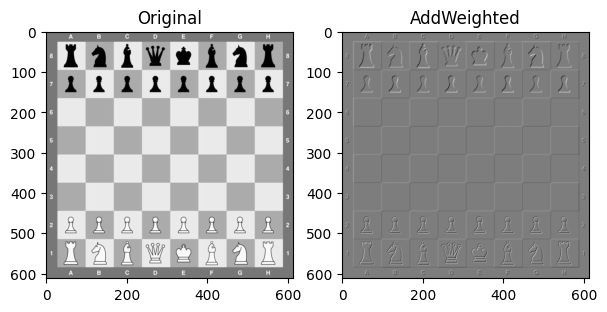

In [33]:
dst = cv2.addWeighted(sobelx, 0.5, sobely, 0.5, 0.0)

# Display Image
images = [img_gray, dst]
titles = ["Original", "AddWeighted"]

plt.figure(figsize=(7, 4))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Image Gradient: Laplacian

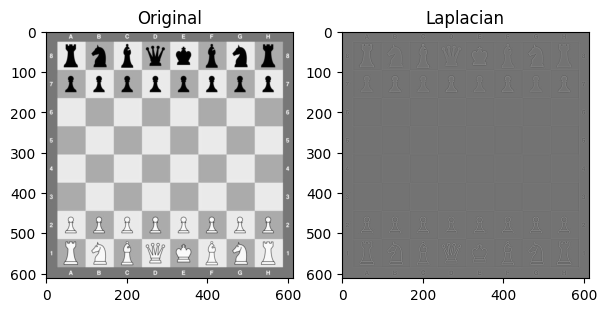

In [34]:
# Laplacian
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)

# Display Image
images = [img_gray, laplacian]
titles = ["Original", "Laplacian"]

plt.figure(figsize=(7, 4))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Sharpen Image

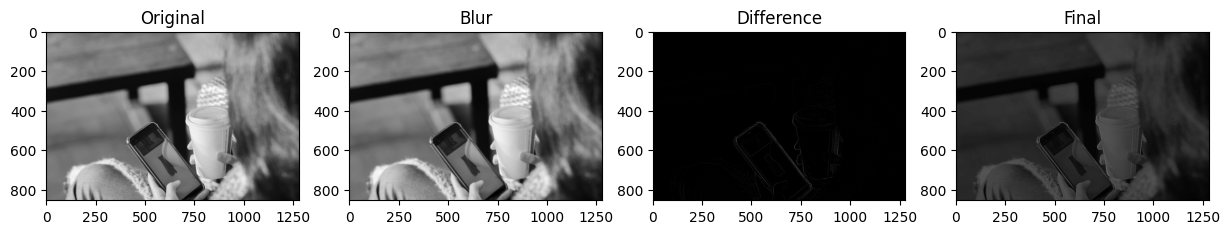

In [44]:
img = cv2.imread("blur_img_2.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur Image
img_blur = cv2.blur(img_gray, (5,5))

# Take Difference
diff = cv2.subtract(img_gray, img_blur)

# Final Image
final = cv2.addWeighted(img_gray, 0.2, diff, 0.8, 0.0)

# Display Image
images = [img_gray, img_blur, diff, final]
titles = ["Original", "Blur", "Difference", "Final"]

plt.figure(figsize=(15, 5))

for i in range(4):
  plt.subplot(1, 4, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Rotate Images

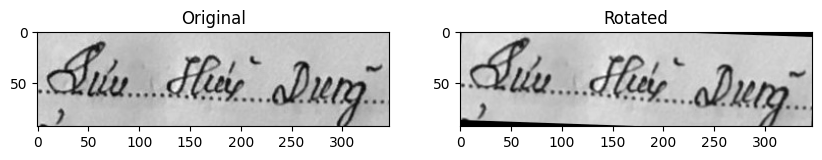

In [45]:
img = cv2.imread("name.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2)

M = cv2.getRotationMatrix2D((cX, cY), np.random.randint(-5, 5), 1.0)
rotated = cv2.warpAffine(img, M, (w, h))

# Display Image
images = [img, rotated]
titles = ["Original", "Rotated"]

plt.figure(figsize=(10, 5))

for i in range(2):
  plt.subplot(1, 2, i+1)
  plt.imshow(images[i], cmap="gray")
  plt.title(titles[i])

plt.show()

## Flip Images

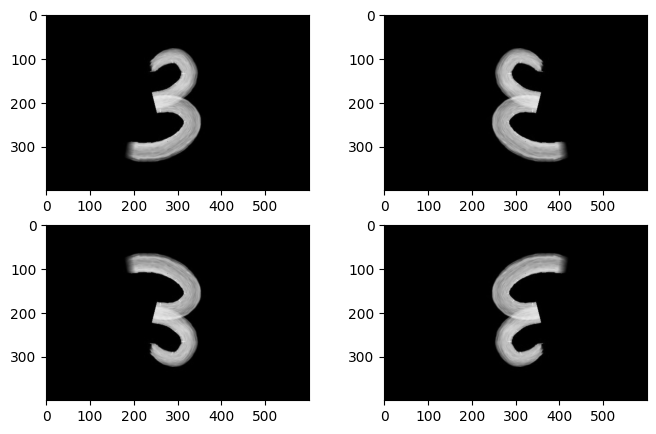

In [48]:
img = cv2.imread("number.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

flip_1 = cv2.flip(img_gray, 1)
flip_0 = cv2.flip(img_gray, 0)
flip_neg_1 = cv2.flip(img_gray, -1)

# Display Image
images = [img_gray, flip_1, flip_0, flip_neg_1]

plt.figure(figsize=(8, 5))

for i in range(4):
  plt.subplot(2, 2, i+1)
  plt.imshow(images[i], cmap="gray")

plt.show()